In [56]:
import pandas as pd
import numpy as np
import sklearn

In [49]:
# Local execution: locate data file (for Colab: mount drive and set DATA_PATH manually)
import os
DATA_PATH = None
for path in ["data/houses_for_rent_madrid.xlsx", "../data/houses_for_rent_madrid.xlsx", "houses_for_rent_madrid.xlsx"]:
    if os.path.exists(path):
        DATA_PATH = path
        break
if DATA_PATH:
    print(f"Using data: {DATA_PATH}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'data_manipulation(1) (1).ipynb'   linear_logistic_regression_lab.ipynb
 Evaluation_Methods.ipynb	   madrid_housing_data_assessment.ipynb
 houses_for_rent_madrid.xlsx	   self_assessment_numpy.ipynb


In [51]:
if DATA_PATH is None:
    raise FileNotFoundError("Could not find houses_for_rent_madrid.xlsx. Run from project root or set DATA_PATH.")
data = pd.read_excel(DATA_PATH)

In [52]:
data.dtypes

,0
Id,int64
District,object
Address,object
Number,object
Area,object
Rent,int64
Bedrooms,float64
Sq.Mt,int64
Floor,float64
Outer,float64


In [53]:
data.describe(include='all')

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2089.000000,2089,2089,747,2085,2089.000000,2000.000000,2089.000000,1948.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,NaN,20,1336,137,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Salamanca,Piso en Recoletos,1,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,313,25,29,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1094.026807,NaN,NaN,NaN,NaN,1932.249402,2.483000,128.919579,25.662731,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,630.612544,NaN,NaN,NaN,NaN,1495.474485,1.305206,115.745014,975.065350,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,1.000000,NaN,NaN,NaN,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,550.000000,NaN,NaN,NaN,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1094.000000,NaN,NaN,NaN,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1636.000000,NaN,NaN,NaN,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
data.shape

(2089, 15)

## Part 1: Remove columns "Id", "District", "Address", "Number"

In [55]:
data_cols_removed = data.drop(columns=['Id', 'District', 'Address', 'Number'])
data_cols_removed.head()

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,Malasaña-Universidad,2490,3.0,97,7.0,1.0,1.0,1,0,0,0
1,Simancas,1300,3.0,110,4.0,1.0,1.0,0,0,0,0
2,Chueca-Justicia,800,NaN,33,NaN,NaN,0.0,0,0,0,0
3,San Isidro,600,1.0,45,2.0,1.0,1.0,0,0,0,0
4,Acacias,1900,1.0,90,7.0,1.0,1.0,1,0,0,0


## Part 2: Imputate missing "Bedrooms", "Floors" and "Sq.Mt"

In [57]:
# Replace the string "NaN" with actual NaN values
data.replace("NaN", np.nan, inplace=True)

# Check missing values before imputation
print("Missing values before imputation:")
print(data[['Bedrooms', 'Floor', 'Sq.Mt']].isnull().sum())

# Impute missing values using the median for each column
data['Bedrooms'] = data['Bedrooms'].fillna(data['Bedrooms'].median())
data['Floor']   = data['Floor'].fillna(data['Floor'].median())
data['Sq.Mt']    = data['Sq.Mt'].fillna(data['Sq.Mt'].median())

# Verify the imputation
print("Missing values after imputation:")
print(data[['Bedrooms', 'Floor', 'Sq.Mt']].isnull().sum())

Missing values before imputation:
Bedrooms     89
Floor       141
Sq.Mt         0
dtype: int64
Missing values after imputation:
Bedrooms    0
Floor       0
Sq.Mt       0
dtype: int64


## Part 3: Remove all rows with a missing value.
(Note: "Bedrooms", "Floor" and "Area" should not have missing value because of the imputation in the last part).

In [60]:
data_no_missing = data_cols_removed.dropna()
data_no_missing.head()

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,Malasaña-Universidad,2490,3.0,97,7.0,1.0,1.0,1,0,0,0
1,Simancas,1300,3.0,110,4.0,1.0,1.0,0,0,0,0
3,San Isidro,600,1.0,45,2.0,1.0,1.0,0,0,0,0
4,Acacias,1900,1.0,90,7.0,1.0,1.0,1,0,0,0
5,Ibiza,1500,4.0,110,3.0,1.0,1.0,0,0,0,0


## Part 4: Plot a histogram of Bedrooms, Floor and Sq.Mt

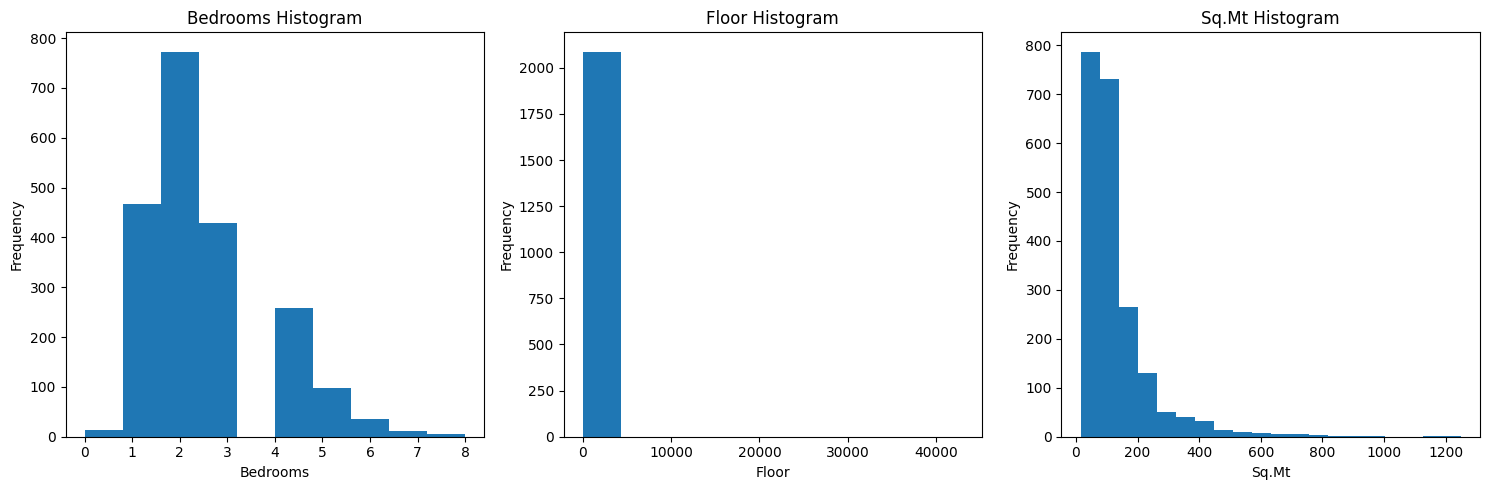

In [61]:
import matplotlib.pyplot as plt

# Plot histograms for Bedrooms, Floor, and Sq.Mt
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data['Bedrooms'], bins=10)
plt.title('Bedrooms Histogram')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Floor'], bins=10)
plt.title('Floor Histogram')
plt.xlabel('Floor')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['Sq.Mt'], bins=20)  # Increased bins for Sq.Mt due to wider range
plt.title('Sq.Mt Histogram')
plt.xlabel('Sq.Mt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Part 5:Remove all rows with Floor>20

In [62]:
# Filter out rows where 'Floor' is greater than 20
data_filtered = data[data['Floor'] <= 20]

# Display the first few rows of the filtered DataFrame
data_filtered.head()


,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1390,Centro,Ático en calle de Alberto Aguilera,11,Malasaña-Universidad,2490,3.0,97,7.0,1.0,1.0,1,0,0,0
1,1896,San Blás,Piso en calle Luis Sánchez Polack Tip,NaN,Simancas,1300,3.0,110,4.0,1.0,1.0,0,0,0,0
2,1366,Centro,Estudio en Chueca-Justicia,NaN,Chueca-Justicia,800,2.0,33,3.0,NaN,0.0,0,0,0,0
3,1407,Carabanchel,Piso en San Isidro,NaN,San Isidro,600,1.0,45,2.0,1.0,1.0,0,0,0,0
4,1072,Arganzuela,Ático en Acacias,NaN,Acacias,1900,1.0,90,7.0,1.0,1.0,1,0,0,0


## Part 6: Split data to train (70%) and val (15%) and test (15%)


In [64]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data_filtered, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (1456, 15)
Validation data shape: (312, 15)
Test data shape: (313, 15)


## Part 7: Impact encode "Area" with respect to target variable ("Rent"), replacing the original column with the encoded column.

Note that the encoding is computed only using the training set, but must be applied to the val and test set as well.  If the val/test set contain rows with "Area" that was not observed in the training, then the encoding cannot be computed for those rows, and they should be removed.

In [65]:
# Calculated the mean of the target variable for each category in the 'Area' column in the training set
area_encoding = train_data.groupby('Area')['Rent'].mean()

# Function to apply the impact encoding
def impact_encode(df, encoding):
    df['Area_encoded'] = df['Area'].map(encoding)
    return df

# Applied the impact encoding to train, val, and test sets
train_data = impact_encode(train_data, area_encoding)
val_data   = impact_encode(val_data, area_encoding)
test_data  = impact_encode(test_data, area_encoding)

# Removed rows with NaN values in the encoded column (areas not seen in training)
train_data.dropna(subset=['Area_encoded'], inplace=True)
val_data.dropna(subset=['Area_encoded'], inplace=True)
test_data.dropna(subset=['Area_encoded'], inplace=True)

# Replaced the original 'Area' column with the encoded one
train_data = train_data.drop('Area', axis=1)
val_data   = val_data.drop('Area', axis=1)
test_data  = test_data.drop('Area', axis=1)

train_data = train_data.rename(columns={'Area_encoded': 'Area'})
val_data   = val_data.rename(columns={'Area_encoded': 'Area'})
test_data  = test_data.rename(columns={'Area_encoded': 'Area'})
